### Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartões de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

In [1]:
# Importar dos módulos para análise dos dados
import pandas as pd
import numpy as np

# Importar dos módulos para plot
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

# Configurar as cores dos gráficos 
sn.set_style("whitegrid")
sn.set_palette('hls')

# Configurar o tamanho dos gráficos
import pylab
pylab.rcParams['figure.figsize'] = (14, 6)

# ANÁLISE

In [2]:
# Importar os dados

dados = pd.read_csv('CC GENERAL.csv')

In [3]:
# Verificar tamanho do dataset

dados.shape

(8950, 18)

In [4]:
# Verificar as colunas do dataset

dados.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Verificar os dados do dataset

dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<AxesSubplot:>

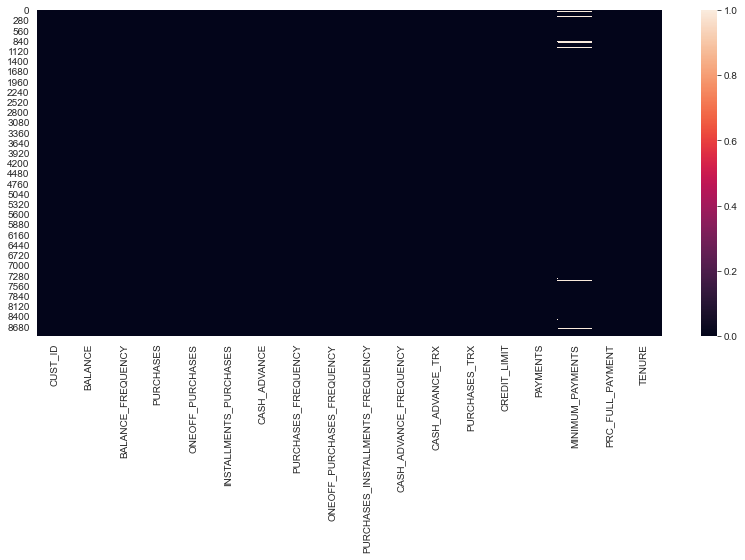

In [6]:
# Verificar se o dataset tem dados nulos

sn.heatmap(dados.isnull())

In [7]:
# Verificar se o dataset tem dados nulos

dados.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Verificar os dados do dataset

for cl in dados.columns:
    print(cl)
    print('', dados[cl].unique())
    print()

CUST_ID
 ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']

BALANCE
 [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]

BALANCE_FREQUENCY
 [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]

PURCHASES
 [  95.4     0.    773.17 ...  291.12  144.4  1093.25]

ONEOFF_PURCHASES
 [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]

INSTALLMENTS_PURCHASES
 [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]

CASH_ADVANCE
 [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]

PURCHASES_FREQUENCY
 [0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.5833

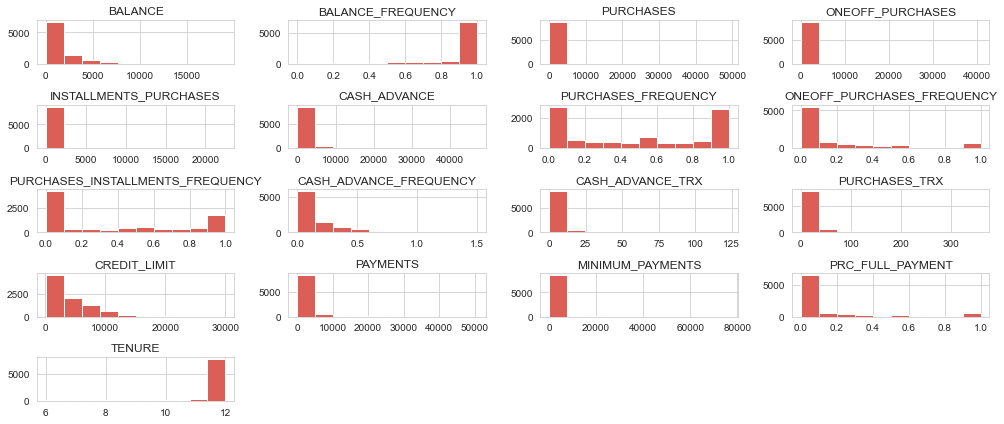

In [9]:
# Verificar os histogramas do dataset

dados.hist()
plt.tight_layout()

In [10]:
# Verificar assimetria dos dados

dados.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [11]:
# Verificar as informações do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
# Verificar dados estatísticos do dataset

dados.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
# Verificar a média

dados['CREDIT_LIMIT'].mean()

4494.449450364621

In [14]:
# Substituir os dados nulos pela média

dados.loc[dados['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = dados['CREDIT_LIMIT'].mean()

In [15]:
# Verificar a média

dados['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [16]:
# Substituir os dados nulos pela média

dados.loc[dados['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = dados['MINIMUM_PAYMENTS'].mean()

In [17]:
# Excluir o campo Cust_id

dados = dados.drop('CUST_ID', axis=1)

In [18]:
# Verificar a correlação dos dados

dados.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<AxesSubplot:title={'center':'Correlação das variáveis'}>

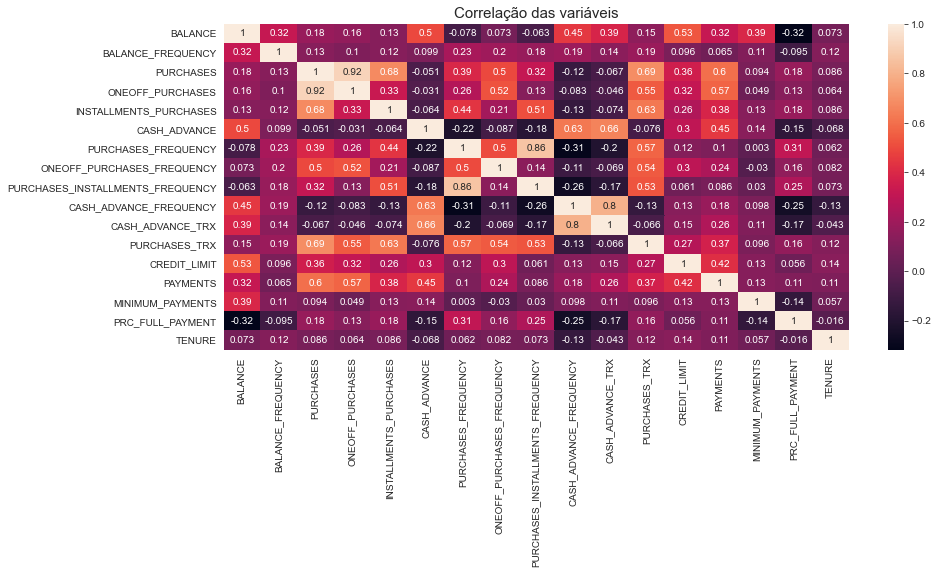

In [19]:
# Verificar a correlação dos dados

fig, ax = plt.subplots()
plt.title("Correlação das variáveis", fontsize=15)
sn.heatmap(dados.corr(), annot=True)

<AxesSubplot:title={'center':'Correlação das variáveis > 0.5'}>

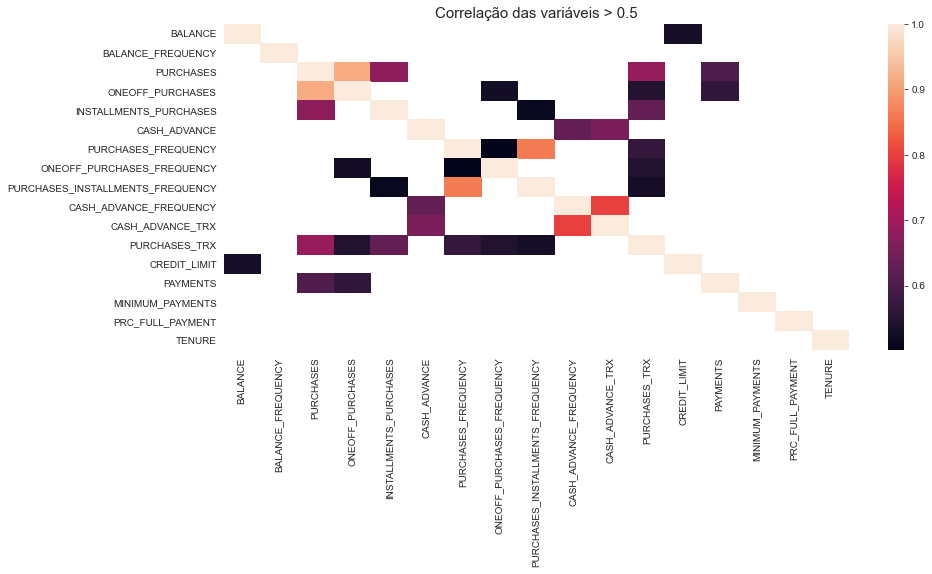

In [20]:
# Verificar a correção das variáveis

x = dados.corr()
x = x[x > 0.5]

fig, ax = plt.subplots()
plt.title("Correlação das variáveis > 0.5", fontsize=15)
sn.heatmap(x)

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\tiago\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:title={'center':'Correlação das variáveis'}>

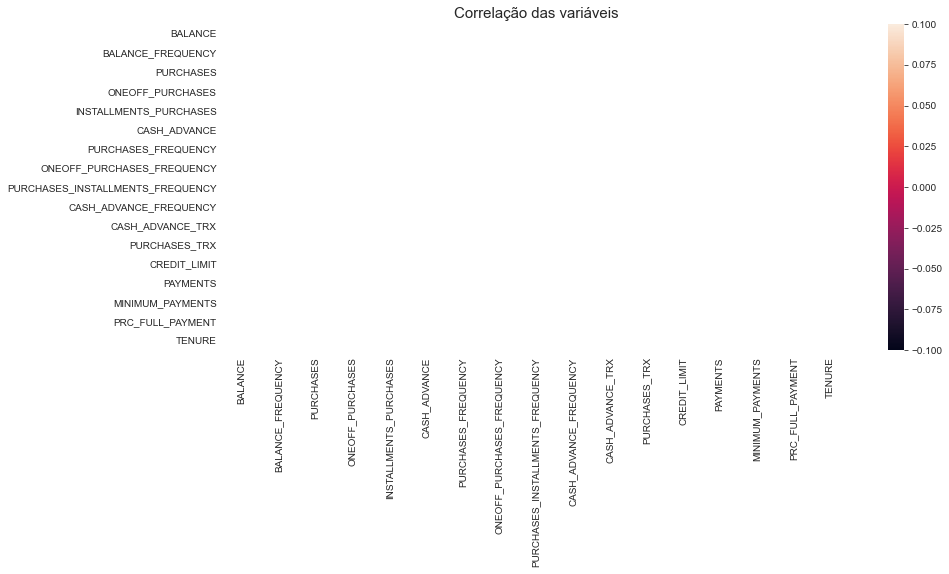

In [21]:
# Verificar a correlação das variáveis

x = dados.corr()
x = x[x < -0.5]

fig, ax = plt.subplots()
plt.title("Correlação das variáveis", fontsize=15)
sn.heatmap(x)

C:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

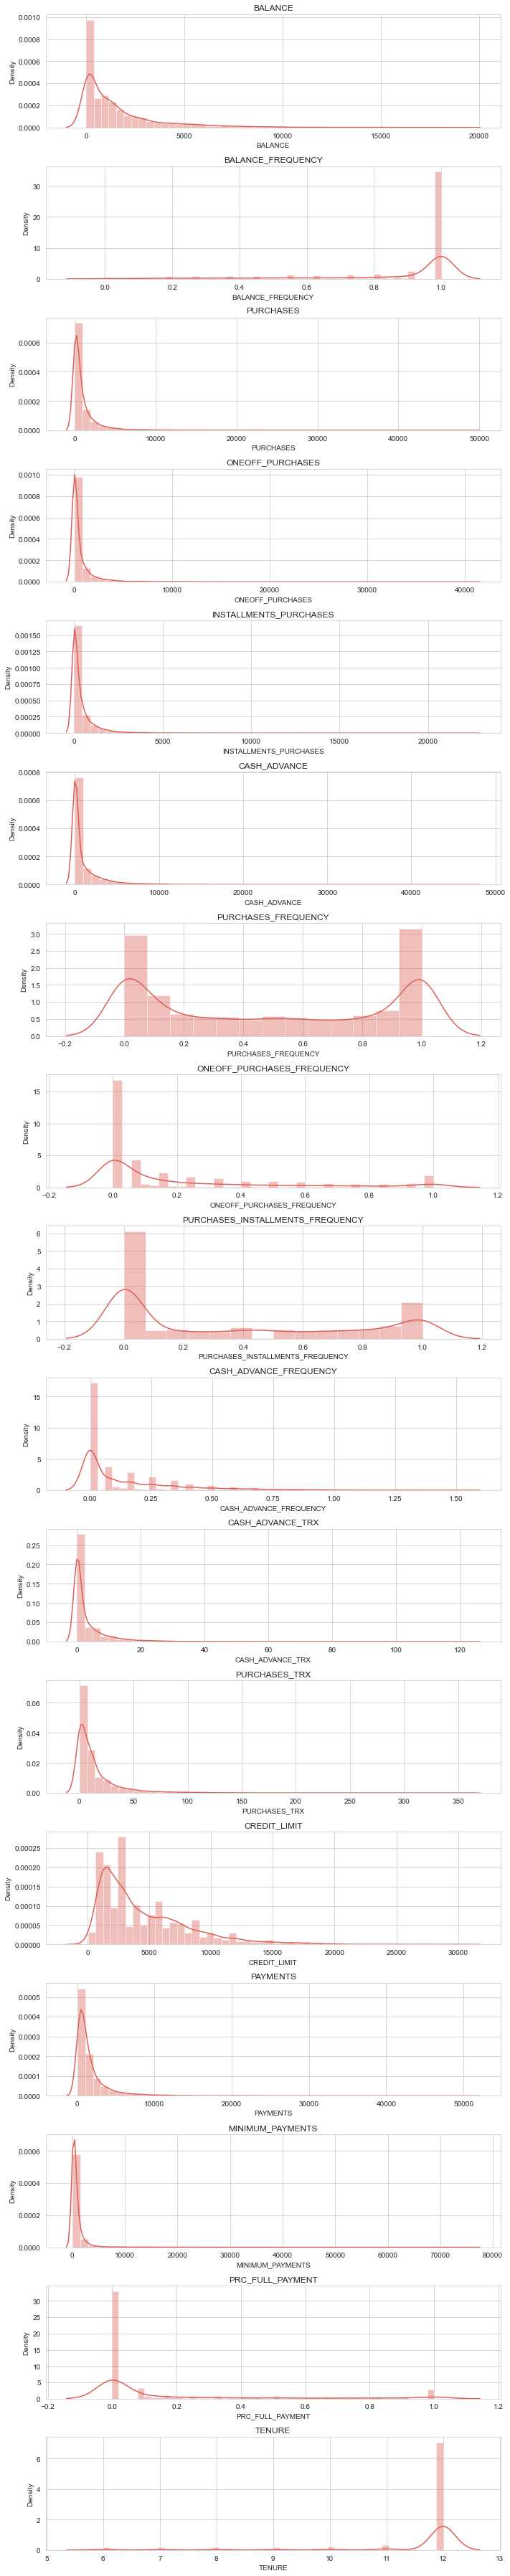

In [22]:
# Plot gráficos do dataset para análise

plt.figure(figsize=(10,50))
for i in range(len(dados.columns)):
    plt.subplot(17, 1, i + 1)
    sn.distplot(dados[dados.columns[i]], kde = True)
    plt.title(dados.columns[i])
plt.tight_layout()
plt.show()

# PRÉ-PROCESSAMENTO

In [23]:
# Importar módulo de pré-processamento

from sklearn.preprocessing import StandardScaler

In [24]:
# Criar modelo

scaler = StandardScaler()

# Treinar o transformar o modelo

dadost = scaler.fit_transform(dados)

# Criar o dataset pré-processado

dadost = pd.DataFrame(dadost, columns= dados.columns)

In [25]:
# Verificar o novo dataset

dadost.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# MODELO

In [26]:
# Importar módulo de IA

from sklearn.cluster import KMeans

In [27]:
# Realizar o teste de cotovelo

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(dadost)
    wcss.append(kmeans.inertia_)

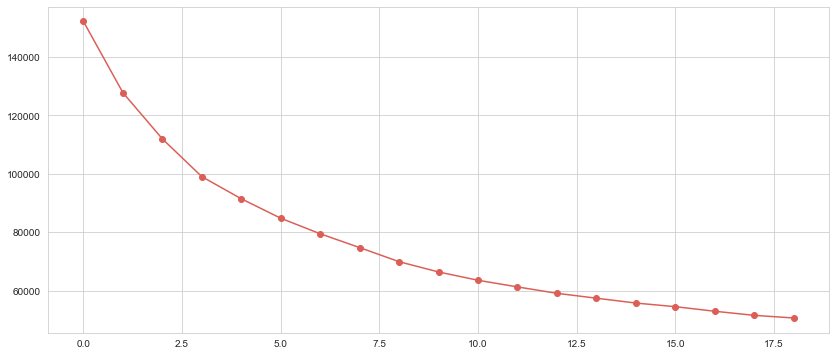

In [28]:
# Plotar o teste de cotovelo

plt.plot(wcss, '-o')

In [29]:
# Verificar o melhor paramentro para o teste

ax = wcss[0]
for n, v in enumerate(wcss):
    print(n, v, round(ax / v -1))

0 152149.9999999988 0
1 127784.97295116594 0
2 111986.69806610141 0
3 99073.95929495181 1
4 91502.25769208788 1
5 84851.13240432614 1
6 79532.40237691817 1
7 74803.34022716687 1
8 69979.25307207133 1
9 66461.2425414236 1
10 63633.108038481485 1
11 61352.78027922217 1
12 59165.643528579436 2
13 57493.51059116417 2
14 55832.35664511639 2
15 54592.75795650987 2
16 53028.403386517675 2
17 51626.9878743603 2
18 50728.129194272304 2


In [30]:
# Criar o modelo de IA

kmeans = KMeans(n_clusters= 3)

# Treinar o modelo de IA

kmeans.fit(dadost)

KMeans(n_clusters=3)

In [31]:
# Verificar os valores do modelo de IA

kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

# VALIDAÇÃO

Esse tipo de modelo de IA não tem validação. Mas podemos verificar ser o agrupamento foi feito conforme o solicitado

In [32]:
# importar módulo de IA

from sklearn.decomposition import PCA

In [33]:
# Criar um modelo de IA

pca = PCA(n_components = 2)

In [34]:
# Transformar os dadaset para dados de 2 dimensões

dadospca = pca.fit_transform(dadost)

In [35]:
# Verificar os valores da transformação

dadospca

array([[-1.68221825, -1.07644751],
       [-1.13828551,  2.50648863],
       [ 0.96967954, -0.38352652],
       ...,
       [-0.92620461, -1.81078588],
       [-2.33655233, -0.65796606],
       [-0.55642716, -0.400475  ]])

In [36]:
# Criar um novo dataset

dadospca = pd.DataFrame(dadospca, columns=['p1', 'p2'])

In [37]:
# Verificar os dados do dataset

dadospca.head()

,p1,p2
0,-1.682218,-1.076448
1,-1.138286,2.506489
2,0.969680,-0.383527
3,-0.873627,0.043165
4,-1.599432,-0.688576


In [38]:
# Acrescentar a clusterização no dataset

dadospca['label'] = kmeans.labels_

<AxesSubplot:xlabel='p1', ylabel='p2'>

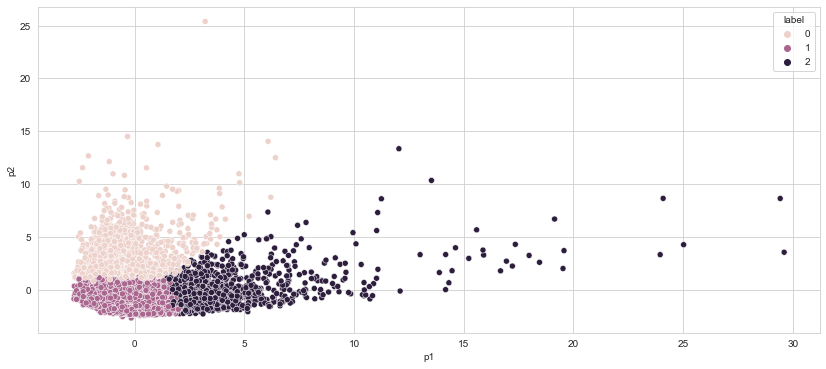

In [39]:
# plot no resultado

sn.scatterplot(x='p1', y='p2', data=dadospca, hue='label')

# CONCLUSÃO

Pelo gráfico podemos verificar que os três grupos que foram criados divide muito bem nossa base de dados

In [40]:
# Adicionar o label na base de dados

dados['label'] = kmeans.labels_

In [41]:
# Criar um dataset com as médias dos grupos

compara = pd.DataFrame()
for vl in range(0, 3):
    x = dados[dados['label'] == vl].mean()
    
    compara[vl] = x.values

compara.index = x.index

In [42]:
# Verificar o dataset criado

round(compara)

,0,1,2
BALANCE,3990.0,799.0,2215.0
BALANCE_FREQUENCY,1.0,1.0,1.0
PURCHASES,387.0,506.0,4272.0
ONEOFF_PURCHASES,249.0,253.0,2721.0
INSTALLMENTS_PURCHASES,138.0,253.0,1551.0
CASH_ADVANCE,3867.0,330.0,456.0
PURCHASES_FREQUENCY,0.0,0.0,1.0
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.0,1.0
CASH_ADVANCE_FREQUENCY,0.0,0.0,0.0


<AxesSubplot:title={'center':'Dataset por grupos'}>

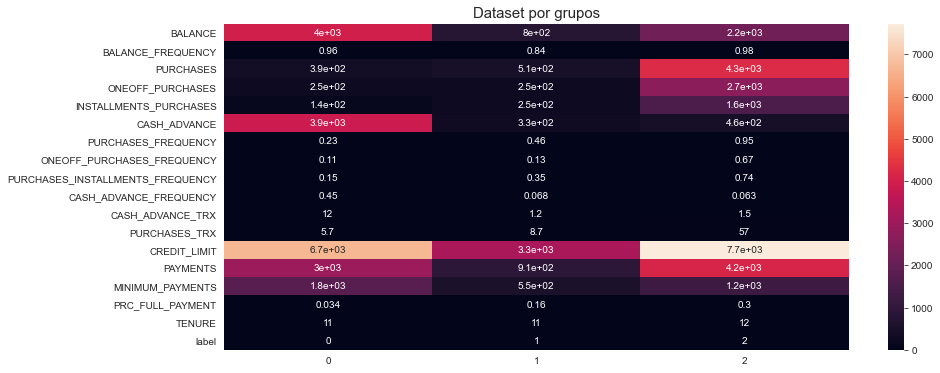

In [43]:
# Plotar o dataset

fig, ax = plt.subplots()
plt.title('Dataset por grupos', fontsize=15)
sn.heatmap(compara, annot=True)

In [44]:
# Verificar a correlação dos grupos

compara.corr()

,0,1,2
0,1.000000,0.870437,0.727584
1,0.870437,1.000000,0.897121
2,0.727584,0.897121,1.000000


<AxesSubplot:title={'center':'Correlação dos grupos'}>

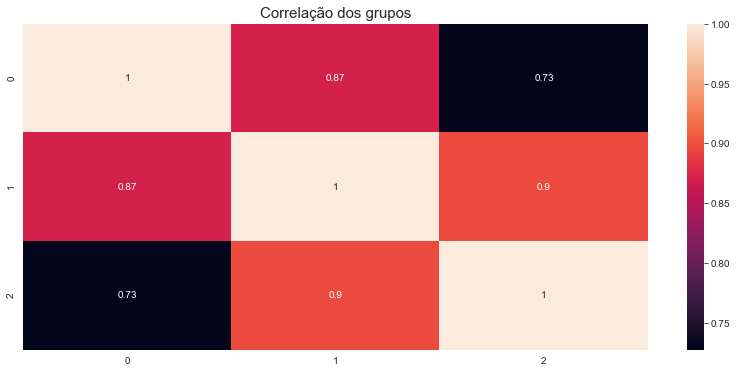

In [45]:
# Verificar a correlação dos grupos

fig, ax = plt.subplots()
plt.title('Correlação dos grupos', fontsize=15)
sn.heatmap(compara.corr(), annot=True)